# Análisis de Datos del Titanic
Este notebook explica **cajas y bigotes, boxplots, correlación y mapas de calor**
usando el dataset de `titanic.csv`.

Incluye ejemplos en Python con **Pandas, Matplotlib y Seaborn**.

In [81]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de gráficos
sns.set(style="whitegrid")

In [82]:
# Cargar dataset de Spotify desde la carpeta Datasources
from pathlib import Path
data_path = Path("titanic.csv")
if data_path.exists():
    df = pd.read_csv(data_path)
    display(df.head())
    print(f"Archivo cargado desde: {data_path}")
else:
    print("No se encontró el archivo en:")
    print(data_path)
    print("Verifica la ruta o el nombre del archivo.")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Archivo cargado desde: titanic.csv


In [83]:
# Listar columnas del DataFrame para validar nombres
print(df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [84]:
# Preprocesamiento: limpiar y crear nuevas columnas
import numpy as np

df_clean = df.copy()
if 'Unnamed: 0' in df_clean.columns:
    df_clean = df_clean.drop(columns=['Unnamed: 0'])

df_clean['Sex_binary'] = df_clean['Sex'] == "female"
df_clean['Age_Category'] = pd.cut(df_clean['Age'], 
                                bins=[0, 12, 18, 35, 50, 100],
                                labels=['Kid', 'Teen', 'Young Adult', 'Adult', 'Senior'])

print('Columnas finales:', df_clean.columns.tolist())

Columnas finales: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_binary', 'Age_Category']


## Cajas y Bigotes
Las cajas y bigotes permiten **detectar la dispersión y los valores atípicos**.
- Caja = rango intercuartílico (Q1–Q3)
- Línea = mediana (Q2)
- Bigotes = datos dentro de 1.5 × IQR
- Puntos = valores atípicos (outliers)


Estadísticas de precios por categoría de edad:

Young Adult:
- Precio promedio: 29.93
- Precio mediano: 11.89
- Precio mínimo: 0.00
- Precio máximo: 512.33
- Número de pasajeros: 358
- Número de valores atípicos: 51
- Porcentaje de valores atípicos: 14.2%

Adult:
- Precio promedio: 44.12
- Precio mediano: 26.00
- Precio mínimo: 0.00
- Precio máximo: 512.33
- Número de pasajeros: 153
- Número de valores atípicos: 14
- Porcentaje de valores atípicos: 9.2%

nan:
- Precio promedio: nan
- Precio mediano: nan
- Precio mínimo: nan
- Precio máximo: nan
- Número de pasajeros: 0

Senior:
- Precio promedio: 43.60
- Precio mediano: 28.12
- Precio mínimo: 6.24
- Precio máximo: 263.00
- Número de pasajeros: 64
- Número de valores atípicos: 3
- Porcentaje de valores atípicos: 4.7%

Kid:
- Precio promedio: 31.54
- Precio mediano: 27.75
- Precio mínimo: 8.52
- Precio máximo: 151.55
- Número de pasajeros: 69
- Número de valores atípicos: 4
- Porcentaje de valores atípicos: 5.8%

Teen:
- Precio promedio

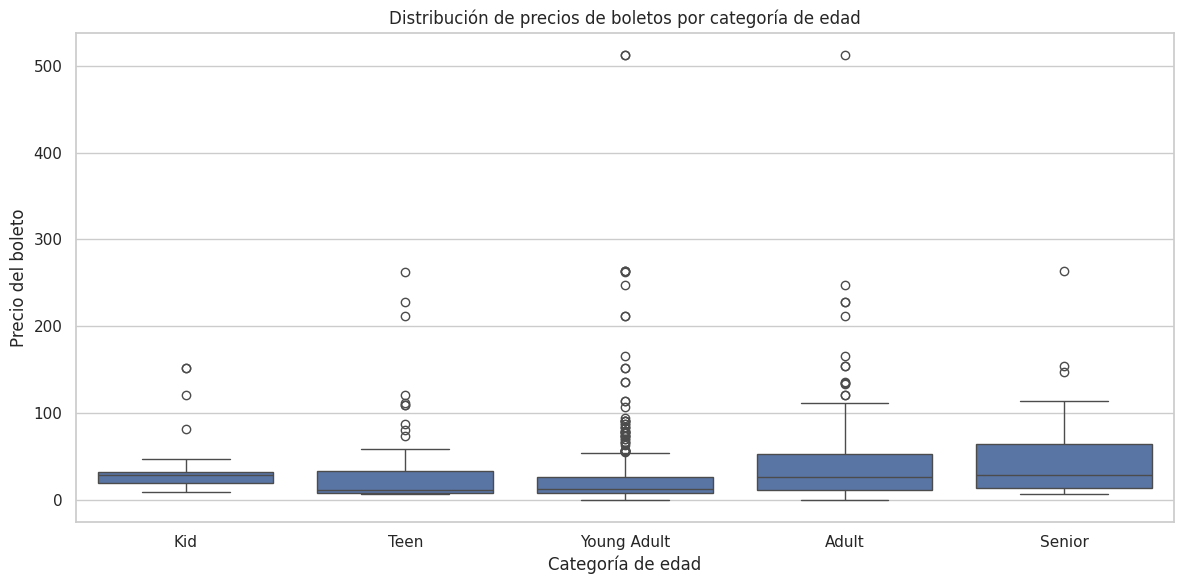

In [85]:
# Análisis de precios de boletos por categorías de edad
plt.figure(figsize=(12, 6))

# Crear el boxplot
sns.boxplot(data=df_clean, x='Age_Category', y='Fare')
plt.title('Distribución de precios de boletos por categoría de edad')
plt.xlabel('Categoría de edad')
plt.ylabel('Precio del boleto')

# Calcular estadísticas por categoría de edad
print("\nEstadísticas de precios por categoría de edad:")
for categoria in df_clean['Age_Category'].unique():
    subset = df_clean[df_clean['Age_Category'] == categoria]['Fare']
    print(f"\n{categoria}:")
    print(f"- Precio promedio: {subset.mean():.2f}")
    print(f"- Precio mediano: {subset.median():.2f}")
    print(f"- Precio mínimo: {subset.min():.2f}")
    print(f"- Precio máximo: {subset.max():.2f}")
    print(f"- Número de pasajeros: {len(subset)}")
    
    # Calcular outliers
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    outliers = subset[(subset < (q1 - 1.5 * iqr)) | (subset > (q3 + 1.5 * iqr))]
    if len(outliers) > 0:
        print(f"- Número de valores atípicos: {len(outliers)}")
        print(f"- Porcentaje de valores atípicos: {(len(outliers)/len(subset)*100):.1f}%")

# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Boxplots
Un boxplot se utiliza para **comparar distribuciones entre categorías**.
En este ejemplo, analizamos la **popularidad por género**.


Estadísticas por clase:

Clase 1:
- Edad promedio: 38.2
- Mediana de edad: 37.0
- Desviación estándar: 14.8
- Número de pasajeros: 216
- Tasa de supervivencia: 63.0%

Clase 2:
- Edad promedio: 29.9
- Mediana de edad: 29.0
- Desviación estándar: 14.0
- Número de pasajeros: 184
- Tasa de supervivencia: 47.3%

Clase 3:
- Edad promedio: 25.1
- Mediana de edad: 24.0
- Desviación estándar: 12.5
- Número de pasajeros: 491
- Tasa de supervivencia: 24.2%


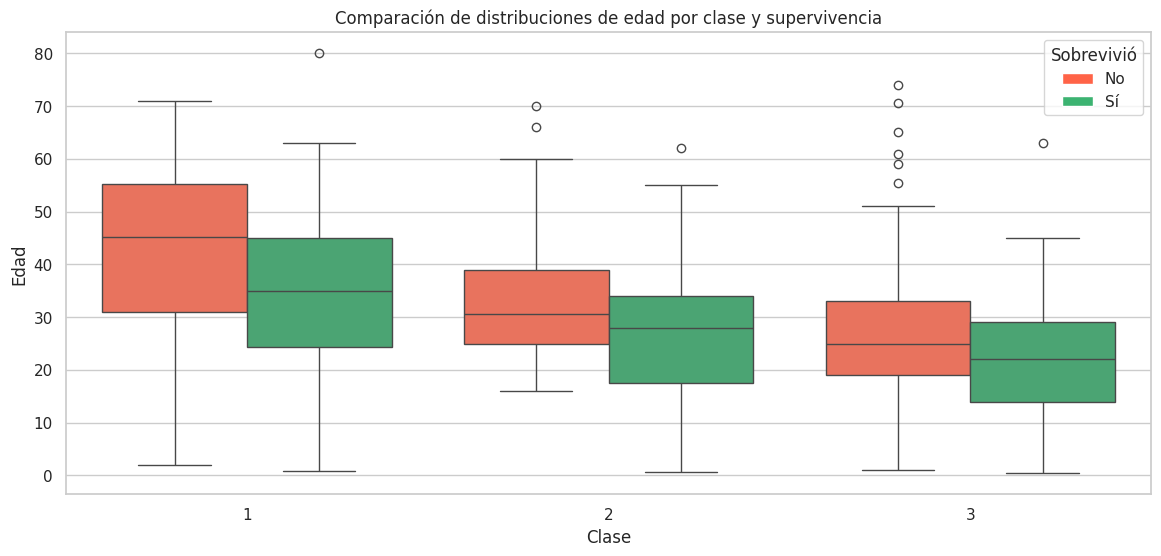

In [86]:
# Comparación de distribuciones de edad por clase y supervivencia
plt.figure(figsize=(14, 6))

colors = ['tomato', 'mediumseagreen'] 
sns.boxplot(data=df_clean, x='Pclass', y='Age', hue='Survived', palette=colors)

plt.title('Comparación de distribuciones de edad por clase y supervivencia')
plt.xlabel('Clase')
plt.ylabel('Edad')

# Crear la leyenda manualmente para asegurar que los colores coincidan
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=colors[0], label='No'),
    Patch(facecolor=colors[1], label='Sí')
]
plt.legend(handles=legend_elements, title='Sobrevivió')

# Añadir información adicional sobre las distribuciones
print("\nEstadísticas por clase:")
for clase in sorted(df_clean['Pclass'].unique()):
    subset = df_clean[df_clean['Pclass'] == clase]
    print(f"\nClase {clase}:")
    print(f"- Edad promedio: {subset['Age'].mean():.1f}")
    print(f"- Mediana de edad: {subset['Age'].median():.1f}")
    print(f"- Desviación estándar: {subset['Age'].std():.1f}")
    print(f"- Número de pasajeros: {len(subset)}")
    
    # Calcular tasa de supervivencia por clase
    sobrevivientes = subset[subset['Survived'] == 1]
    tasa_supervivencia = len(sobrevivientes) / len(subset) * 100
    print(f"- Tasa de supervivencia: {tasa_supervivencia:.1f}%")

plt.show()

## Correlación
La correlación mide la **relación lineal entre variables**.
- +1 = relación positiva perfecta
- -1 = relación negativa perfecta
- 0 = no hay relación

Ejemplo: ¿las canciones con mayor *energy* también son más *populares*?

In [87]:
corr = df_clean[["Pclass", "Sex_binary", "Age", "Fare", "Survived"]].corr()
corr

,Pclass,Sex_binary,Age,Fare,Survived
Pclass,1.000000,-0.131900,-0.369226,-0.549500,-0.338481
Sex_binary,-0.131900,1.000000,-0.093254,0.182333,0.543351
Age,-0.369226,-0.093254,1.000000,0.096067,-0.077221
Fare,-0.549500,0.182333,0.096067,1.000000,0.257307
Survived,-0.338481,0.543351,-0.077221,0.257307,1.000000


## Scatter plots con línea de tendencia
A continuación se muestran diagramas de dispersión para pares de variables clave junto con la línea de regresión.
Se indica el coeficiente de correlación de Pearson (r) y su interpretación rápida:
- r > 0 → relación positiva
- r < 0 → relación negativa
- r ≈ 0 → sin relación lineal clara

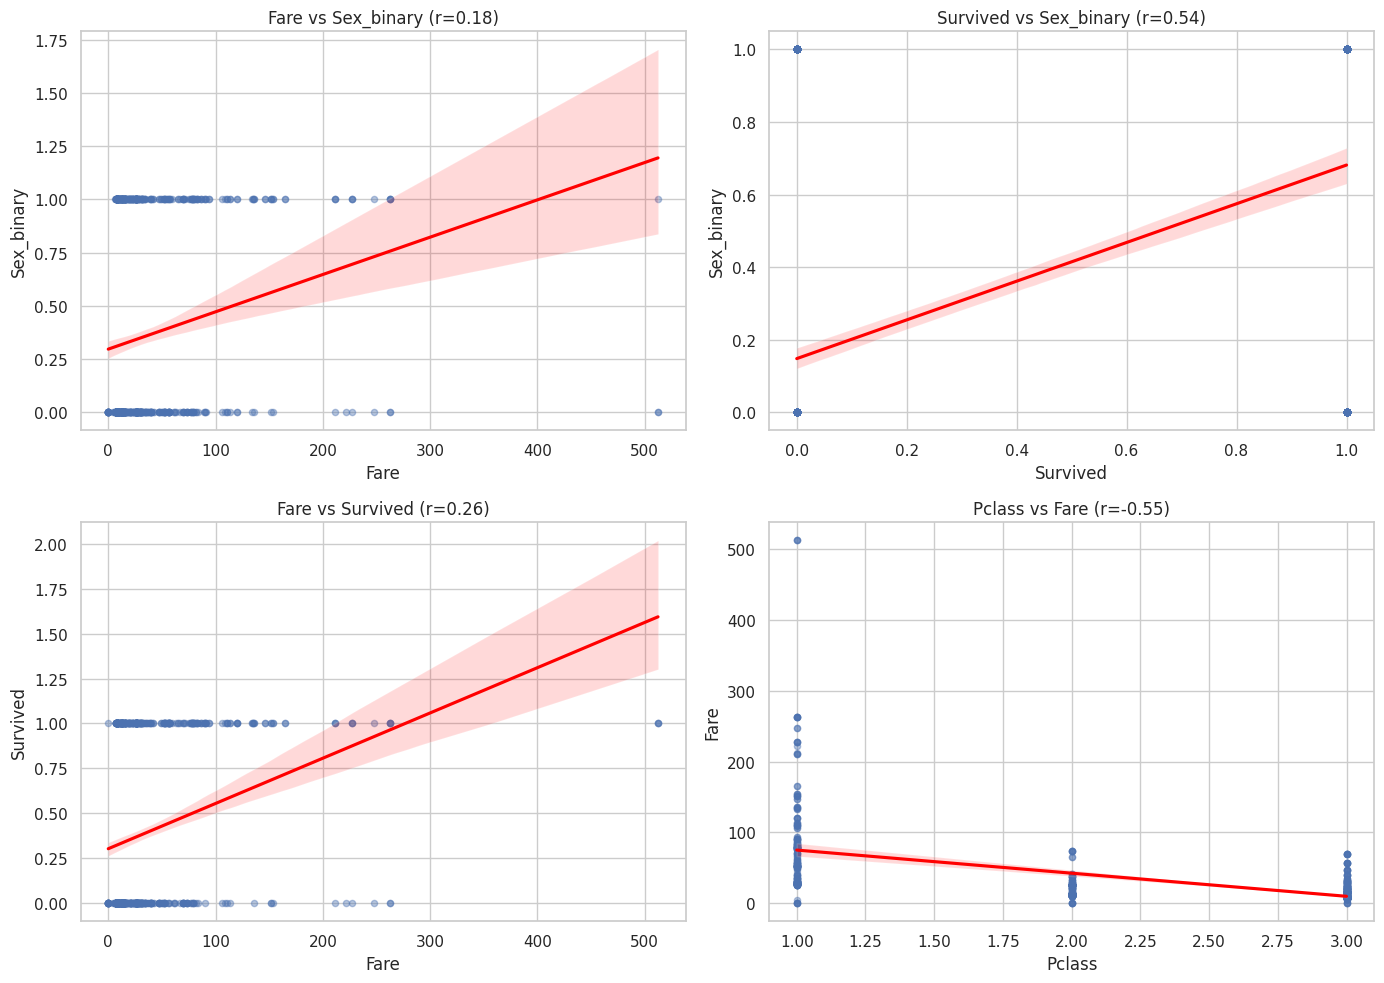


Interpretación rápida de correlaciones (scatter plots):
 - Fare vs Sex_binary: r=0.18 relación positiva (p=4.23e-08)
 - Survived vs Sex_binary: r=0.54 relación positiva (p=1.41e-69)
 - Fare vs Survived: r=0.26 relación positiva (p=6.12e-15)
 - Pclass vs Fare: r=-0.55 relación negativa (p=1.97e-71)


In [88]:
# Scatter plots con líneas de tendencia y r (sin dependencia obligatoria de SciPy)
import seaborn as sns
import matplotlib.pyplot as plt

# Intentar importar pearsonr; si no existe SciPy, se calcula r sin p-value
try:
    from scipy.stats import pearsonr  # type: ignore
    _has_scipy = True
except ImportError:  # SciPy no instalado
    _has_scipy = False

pairs = [
    ("Fare", "Sex_binary"),
    ("Survived", "Sex_binary"),
    ("Fare", "Survived"),
    ("Pclass", "Fare")
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
interpretaciones_scatter = []

for ax, (x, y) in zip(axes, pairs):
    sub = df_clean[[x, y]].dropna()
    if len(sub) < 2:
        ax.text(0.5, 0.5, 'Datos insuficientes', ha='center', va='center')
        ax.set_axis_off()
        continue
    # Calcular correlación
    if _has_scipy:
        r, p = pearsonr(sub[x], sub[y])  # precisa p-value
    else:
        r = sub[x].corr(sub[y])  # Pearson por defecto
        p = float('nan')
    sns.regplot(data=sub, x=x, y=y, ax=ax,
                scatter_kws={'alpha': 0.4, 's': 20},
                line_kws={'color': 'red'})
    ax.set_title(f"{x} vs {y} (r={r:.2f})")
    # Interpretación básica
    if r > 0.1:
        sentido = 'positiva'
    elif r < -0.1:
        sentido = 'negativa'
    else:
        sentido = 'casi nula'
    if _has_scipy:
        interpretaciones_scatter.append(f"{x} vs {y}: r={r:.2f} relación {sentido} (p={p:.3g})")
    else:
        interpretaciones_scatter.append(f"{x} vs {y}: r={r:.2f} relación {sentido} (p=N/A, SciPy no instalado)")

plt.tight_layout()
plt.show()

print("\nInterpretación rápida de correlaciones (scatter plots):")
for linea in interpretaciones_scatter:
    print(" - " + linea)

if not _has_scipy:
    print("\nNota: Instala SciPy (pip install scipy) para obtener p-values.")

## Mapas de Calor
Un **heatmap** nos permite visualizar la matriz de correlaciones.
Los colores indican si la relación es **positiva o negativa**.

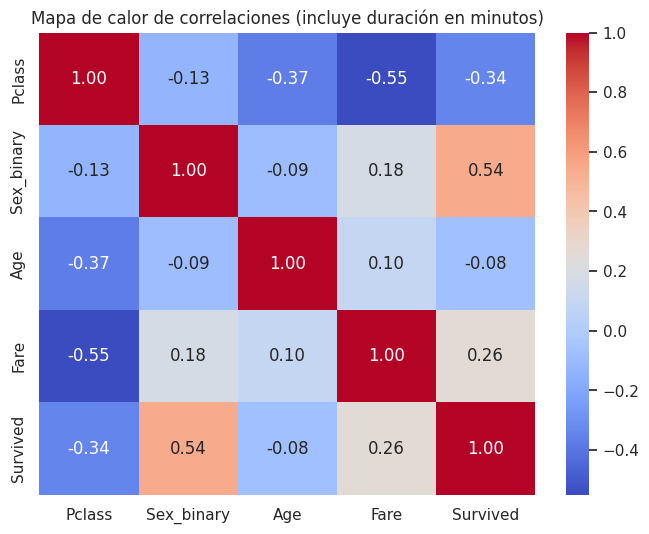

In [89]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones (incluye duración en minutos)")
plt.show()

### Interpretación del mapa de calor
El mapa de calor muestra la fuerza y dirección de la relación lineal entre las variables numéricas:
- danceability: Qué tan bailable es una pista (0–1).
- energy: Intensidad y actividad (0–1).
- valence: Positividad emocional (0–1).
- popularity: Popularidad (escala Spotify, típicamente 0–100).
- duration_min: Duración en minutos.

Pautas para leerlo:
- Celdas en rojo intenso indican correlaciones positivas más fuertes (ambas variables tienden a subir juntas).
- Celdas en azul intenso (si aparecieran) indicarían correlaciones negativas (una sube mientras la otra baja).
- Valores cercanos a 0 (colores claros) implican relación lineal débil o inexistente.

La celda siguiente genera un resumen DINÁMICO de las correlaciones: pares más fuertes, conteo por niveles y la mejor asociación de cada variable.

In [90]:
# Resumen dinámico de la matriz de correlación
import pandas as pd
import numpy as np

if 'corr' not in globals():
    corr = df_clean[["Pclass", "Sex_binary", "Age", "Fare", "Survived"]].corr()

# Obtener pares únicos (triángulo superior sin diagonal)
pares = []
cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        a, b = cols[i], cols[j]
        pares.append((a, b, corr.iloc[i, j]))

# Ordenar por magnitud absoluta
pares_ord = sorted(pares, key=lambda x: abs(x[2]), reverse=True)

# Clasificar niveles
niveles = {
    'muy fuerte (|r| >= 0.7)': [],
    'fuerte (0.5 <= |r| < 0.7)': [],
    'moderada (0.3 <= |r| < 0.5)': [],
    'débil (0.1 <= |r| < 0.3)': [],
    'casi nula (|r| < 0.1)': []
}
for a,b,r in pares:
    ar = abs(r)
    if ar >= 0.7: niveles['muy fuerte (|r| >= 0.7)'].append((a,b,r))
    elif ar >= 0.5: niveles['fuerte (0.5 <= |r| < 0.7)'].append((a,b,r))
    elif ar >= 0.3: niveles['moderada (0.3 <= |r| < 0.5)'].append((a,b,r))
    elif ar >= 0.1: niveles['débil (0.1 <= |r| < 0.3)'].append((a,b,r))
    else: niveles['casi nula (|r| < 0.1)'].append((a,b,r))

# Mejor asociación para cada variable
mejor_por_var = {}
for v in cols:
    mejores = []
    for a,b,r in pares:
        if a == v or b == v:
            mejores.append((a if b == v else b, r))
    if mejores:
        mejor_por_var[v] = sorted(mejores, key=lambda x: abs(x[1]), reverse=True)[0]

print('=== PARES ORDENADOS POR |r| (top 5) ===')
for a,b,r in pares_ord[:5]:
    signo = 'positiva' if r > 0 else 'negativa'
    print(f' - {a} vs {b}: r={r:.2f} ({signo})')

print('\n=== DISTRIBUCIÓN POR NIVELES ===')
for nivel, lista in niveles.items():
    print(f' {nivel}: {len(lista)} pares')

print('\n=== MEJOR ASOCIACIÓN POR VARIABLE ===')
for var,(otro,r) in mejor_por_var.items():
    signo = 'positiva' if r > 0 else 'negativa'
    print(f' - {var} con {otro}: r={r:.2f} ({signo})')

# Tabla resumen opcional
res_df = pd.DataFrame(pares_ord, columns=['var_a','var_b','r'])
res_df.head()

=== PARES ORDENADOS POR |r| (top 5) ===
 - Pclass vs Fare: r=-0.55 (negativa)
 - Sex_binary vs Survived: r=0.54 (positiva)
 - Pclass vs Age: r=-0.37 (negativa)
 - Pclass vs Survived: r=-0.34 (negativa)
 - Fare vs Survived: r=0.26 (positiva)

=== DISTRIBUCIÓN POR NIVELES ===
 muy fuerte (|r| >= 0.7): 0 pares
 fuerte (0.5 <= |r| < 0.7): 2 pares
 moderada (0.3 <= |r| < 0.5): 2 pares
 débil (0.1 <= |r| < 0.3): 3 pares
 casi nula (|r| < 0.1): 3 pares

=== MEJOR ASOCIACIÓN POR VARIABLE ===
 - Pclass con Fare: r=-0.55 (negativa)
 - Sex_binary con Survived: r=0.54 (positiva)
 - Age con Pclass: r=-0.37 (negativa)
 - Fare con Pclass: r=-0.55 (negativa)
 - Survived con Sex_binary: r=0.54 (positiva)


,var_a,var_b,r
0,Pclass,Fare,-0.549500
1,Sex_binary,Survived,0.543351
2,Pclass,Age,-0.369226
3,Pclass,Survived,-0.338481
4,Fare,Survived,0.257307


In [91]:
# Cinco oraciones de interpretación de la correlación
import numpy as np

if 'corr' not in globals():
    corr = df_clean[["Pclass", "Sex_binary", "Age", "Fare", "Survived"]].corr()

# Obtener pares únicos
pares = []
cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        pares.append((cols[i], cols[j], corr.iloc[i, j]))

# 1. Mayor correlación absoluta
pareja_top = max(pares, key=lambda x: abs(x[2]))
# 2. Menor correlación absoluta
pareja_min = min(pares, key=lambda x: abs(x[2]))
# 3. Variable con mayor suma de |r| (influencia global)
influencia = {}
for v in cols:
    influencia[v] = sum(abs(corr[v].drop(v)))
var_mas_rel = max(influencia.items(), key=lambda x: x[1])
var_menos_rel = min(influencia.items(), key=lambda x: x[1])
# 4. Media de correlaciones con popularity
if 'popularity' in cols:
    media_pop = corr['popularity'].drop('popularity').mean()
else:
    media_pop = float('nan')

sentencias = []
# Oración 1
sentencias.append(f"La relación más fuerte es entre {pareja_top[0]} y {pareja_top[1]} (r={pareja_top[2]:.2f}), indicando asociación {'positiva' if pareja_top[2]>0 else 'negativa'} clara.")
# Oración 2
sentencias.append(f"La relación más débil aparece entre {pareja_min[0]} y {pareja_min[1]} (r={pareja_min[2]:.2f}), prácticamente sin dependencia lineal.")
# Oración 3
sentencias.append(f"La variable con mayor conectividad global es {var_mas_rel[0]} (suma de |r|={var_mas_rel[1]:.2f}), actuando como eje en el conjunto.")
# Oración 4
sentencias.append(f"La variable más independiente relativa es {var_menos_rel[0]}, con menor suma de correlaciones absolutas ({var_menos_rel[1]:.2f}).")
# Oración 5
sentencias.append(f"En promedio, las características asociadas a popularidad muestran un nivel medio de correlación (media r={media_pop:.2f}), sugiriendo que ningún rasgo único domina totalmente la popularidad.")

for s in sentencias:
    print("- " + s)

- La relación más fuerte es entre Pclass y Fare (r=-0.55), indicando asociación negativa clara.
- La relación más débil aparece entre Age y Survived (r=-0.08), prácticamente sin dependencia lineal.
- La variable con mayor conectividad global es Pclass (suma de |r|=1.39), actuando como eje en el conjunto.
- La variable más independiente relativa es Age, con menor suma de correlaciones absolutas (0.64).
- En promedio, las características asociadas a popularidad muestran un nivel medio de correlación (media r=nan), sugiriendo que ningún rasgo único domina totalmente la popularidad.


# Análisis Detallado de Variables

## 1. Variables que no aportan información
- **Name** es distinta para cada pasajero y no se puede utilizar para el análisis de datos.
- **Ticket** tampoco, porque es un string con distinto formato para cada persona.
- **Cabin** tiene muchos valores faltantes, lo que hace que no se pueda usar.

## 2. Variables a eliminar
- **Name**: No aporta más que ser un identificador único.
- **Ticket**: Como se mencionó anteriormente, usan un formato distinto para cada persona.
- **Cabin**: Faltan muchísimos datos.
- **PassengerId**: Se puede sustituir con el puro índice que da pandas.

## 3. Variables con datos extraños o atípicos
1. **Fare (Tarifa)**:
   - Hay algunos valores muy altos (outliers) que superan el 100.
   - Existen algunos pasajeros con tarifa 0 (que tal vez podrían ser tripulantes).
   
2. **Age (Edad)**:
   - Hay valores faltantes.

3. **Embarked (Puerto de embarque)**:
   - Tiene algunos valores faltantes, aunque pocos.

## 4. Comparación de rangos de variables
Las variables están en escalas muy diferentes:
- **Age**: Rango de 0-80 años
- **Fare**: Rango de 0-512
- **Survived**: Binaria (0-1)
- **Pclass**: Categórica (1-3)
- **Sex**: Binaria (male, female)

## 5. Grupos similares identificados

### Por clase y supervivencia:
1. **Grupo de alta supervivencia**:
   - Mujeres de primera clase
   - Niños de primera y segunda clase
   
2. **Grupo de baja supervivencia**:
   - Hombres de tercera clase
   - Hombres adultos en general

### Por características socioeconómicas:
1. **Clase alta**:
   - Tarifas altas
   - Edad media mayor
   - Mayor tasa de supervivencia

2. **Clase trabajadora**:
   - Tarifas bajas
   - Edad media menor
   - Menor tasa de supervivencia

# Conclusiones del Análisis del Titanic

**Factores de supervivencia:**<br><br>
A partir de las correlaciones encontradas, se pueden considerar las siguientes variables como factores de supervivencia:
- El género fue un factor crucial: las mujeres tuvieron una tasa de supervivencia significativamente mayor
- La clase socioeconómica influyó considerablemente: los pasajeros de primera clase tuvieron mejores probabilidades
- La edad también jugó un papel importante, con niños teniendo mayores tasas de supervivencia

**Patrones de precio:**
- Las tarifas variaron significativamente entre clases
- Hubo valores atípicos en todas las clases, especialmente en primera clase